In [1]:
import banana_inspector
import banana_inspector.funs as fu
# import useful_scit.p
from useful_scit.imps2.defs import *

In [2]:
file_path = '/Volumes/Transcend/diego_tr/nais-processor/test/data_out/NAISp20180615np.sum'

In [3]:
ds = fu.open_darray(file_path)

In [4]:
ds

print(5)

5


In [5]:
print(3)

In [ ]:
ds1 = fu.open_sum(file_path)

In [6]:
ds1

<xarray.Dataset>
Dimensions:     (Dp: 29, time: 411)
Coordinates:
  * Dp          (Dp) float64 7.499e-10 8.66e-10 1e-09 ... 3.652e-08 4.217e-08
  * time        (time) datetime64[ns] 2018-06-15T00:02:04.999995904 ... 2018-...
Data variables:
    dndlDp      (Dp, time) float64 1.36e+03 2.265e+03 1.306e+04 ... nan nan nan
    conc        (time) float64 796.7 901.1 3.554e+03 ... 7.561e+03 1.857e+03
    log_Dp_dis  (Dp) float64 0.0625 0.0625 0.0625 ... 0.0625 0.0625 0.0625

<ipython-input-7-bbafe8d994b1>:2: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=mpl.colors.SymLogNorm(20), cmap='cividis',


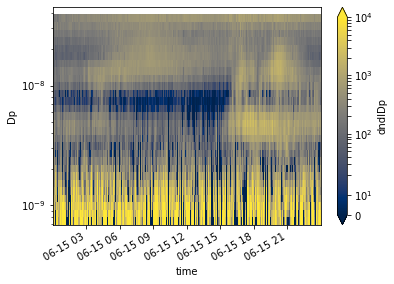

In [7]:
ds1['dndlDp'].plot(
		norm=mpl.colors.SymLogNorm(20), cmap='cividis',
		vmin=0,
		vmax=1e4,
		yscale='log'
		)

In [8]:
%gui qt5

In [39]:
# -*- coding: utf-8 -*-
"""
Display a non-uniform image.
This example displays 2-d data as an image with non-uniformly
distributed sample points.
"""

# import initExample ## Add path to library (just for examples; you do not need this)

from pyqtgraph.Qt import QtGui, QtCore
import pyqtgraph as pg
import numpy as np
from pyqtgraph.graphicsItems.GradientEditorItem import Gradients
from pyqtgraph.graphicsItems.NonUniformImage import NonUniformImage


RPM2RADS = 2 * np.pi / 60
RADS2RPM = 1 / RPM2RADS

kfric  = 1       # [Ws/rad] angular damping coefficient [0;100]
kfric3 = 1.5e-6  # [Ws3/rad3] angular damping coefficient (3rd order) [0;10-3]
psi    = 0.2     # [Vs] flux linkage [0.001;10]
res    = 5e-3    # [Ohm] resistance [0;100]
v_ref  = 200     # [V] reference DC voltage [0;1000]
k_v    = 5       # linear voltage coefficient [-100;100]

# create the (non-uniform) scales
tau = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220], dtype=np.float32)
w = np.array([0, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], dtype=np.float32) * RPM2RADS
v = 380

# calculate the power losses
TAU, W = np.meshgrid(tau, w, indexing='ij')
V = np.ones_like(TAU) * v

P_loss = kfric * W + kfric3 * W ** 3 + (res * (TAU / psi) ** 2) + k_v * (V - v_ref)

P_mech = TAU * W
P_loss[P_mech > 1.5e5] = np.NaN

# green - orange - red
Gradients['gor'] = {'ticks': [(0.0, (74, 158, 71)), (0.5, (255, 230, 0)), (1, (191, 79, 76))], 'mode': 'rgb'}

app = pg.mkQApp("NonUniform Image Example")

win = QtGui.QMainWindow()
cw = pg.GraphicsLayoutWidget()
win.show()
win.resize(600, 400)
win.setCentralWidget(cw)
win.setWindowTitle('pyqtgraph example: Non-uniform Image')

p = cw.addPlot(title="Power Losses [W]", row=0, col=0)
p.setLogMode( x=None , y=True )
lut = pg.HistogramLUTItem(orientation="horizontal")

# p.setMouseEnabled(x=False, y=False)

cw.nextRow()
cw.addItem(lut)

# load the gradient
lut.gradient.loadPreset('gor')

image = NonUniformImage(w * RADS2RPM, np.log10(tau+10), P_loss.T)
image.setLookupTable(lut, autoLevel=True)
image.setZValue(-1)
p.addItem(image)

h = image.getHistogram()
lut.plot.setData(*h)

p.showGrid(x=True, y=True)

p.setLabel(axis='bottom', text='Speed [rpm]')
p.setLabel(axis='left', text='Torque [Nm]')

# elevate the grid lines
p.axes['bottom']['item'].setZValue(1000)
p.axes['left']['item'].setZValue(1000)


In [40]:
import banana_inspector.docks.BananaPlot as bnnp

ModuleNotFoundError: No module named 'banana_inspector.docks.BananaPlot'

In [ ]:

app = pg.mkQApp("NonUniform Image Example")

win = QtGui.QMainWindow()
win.show()
win.resize(600, 400)
bp = bnnp.BananaPlot(win)
win.setCentralWidget(bp)
bp.plot_example()

In [ ]:
cw = bp.centralWidget


In [ ]:
hi = list(cw.items.keys())[0]

In [ ]:
hi.axis.setLogMode(True)

In [ ]:
ds1


In [ ]:

from pyqtgraph.canvas import Canvas

In [ ]:
app = pg.mkQApp("NonUniform Image Example")

win = QtGui.QMainWindow()
win.show()
win.resize(600, 400)
bp = Canvas()
win.setCentralWidget(bp)
# bp.plot_example()

In [8]:
# -*- coding: utf-8 -*-
"""
Demonstrates some customized mouse interaction by drawing a crosshair that follows
the mouse.


"""

# import initExample ## Add path to library (just for examples; you do not need this)
import numpy as np
import pyqtgraph as pg
from pyqtgraph.Qt import QtGui, QtCore
from pyqtgraph.Point import Point

#generate layout
app = pg.mkQApp("Crosshair Example")
win = pg.GraphicsLayoutWidget(show=True)
win.setWindowTitle('pyqtgraph example: crosshair')
label = pg.LabelItem(justify='right')
win.addItem(label)
p1 = win.addPlot(row=1, col=0)
# p2 = win.addPlot(row=2, col=0)

region = pg.LinearRegionItem()
region.setZValue(10)
# Add the LinearRegionItem to the ViewBox, but tell the ViewBox to exclude this
# item when doing auto-range calculations.
# p2.addItem(region, ignoreBounds=True)

#pg.dbg()
p1.setAutoVisible(y=True)


#create numpy arrays
#make the numbers large to show that the range shows data from 10000 to all the way 0
data1 = 10000 + 15000 * pg.gaussianFilter(np.random.random(size=10000), 10) + 3000 * np.random.random(size=10000)
data2 = 15000 + 15000 * pg.gaussianFilter(np.random.random(size=10000), 10) + 3000 * np.random.random(size=10000)

# p1.plot(data1, pen="r")
# p1.plot(data2, pen="g")

# p2d = p2.plot(data1, pen="w")
# bound the LinearRegionItem to the plotted data
# region.setClipItem(p2d)

def update():
    region.setZValue(10)
    minX, maxX = region.getRegion()
    p1.setXRange(minX, maxX, padding=0)

region.sigRegionChanged.connect(update)

def updateRegion(window, viewRange):
    rgn = viewRange[0]
    region.setRegion(rgn)

p1.sigRangeChanged.connect(updateRegion)

region.setRegion([1000, 2000])

#cross hair
vLine = pg.InfiniteLine(angle=90, movable=False)
hLine = pg.InfiniteLine(angle=0, movable=False)
p1.addItem(vLine, ignoreBounds=True)
p1.addItem(hLine, ignoreBounds=True)


vb = p1.vb

def mouseMoved(evt):

    pos = evt[0]  ## using signal proxy turns original arguments into a tuple
    if p1.sceneBoundingRect().contains(pos):
        mousePoint = vb.mapSceneToView(pos)
        index = int(mousePoint.x())
        if index > 0 and index < len(data1):
            label.setText("<span style='font-size: 12pt'>x=%0.1f,   <span style='color: red'>y1=%0.1f</span>,   <span style='color: green'>y2=%0.1f</span>" % (mousePoint.x(), mousePoint.y(), data2[index]))
        vLine.setPos(mousePoint.x())
        hLine.setPos(mousePoint.y())



# proxy = pg.SignalProxy(p1.scene().sigMouseMoved, rateLimit=60, slot=mouseMoved)
#p1.scene().sigMouseMoved.connect(mouseMoved)

proxy = pg.SignalProxy(p1.scene().sigMouseClicked, slot=mouseMoved)

In [43]:
pp = p1.scene()

In [9]:
pp.sigMouseClicked()


NameError: name 'pp' is not defined

In [9]:
import sys
from PyQt5 import QtCore, QtGui, QtWidgets
import pyqtgraph as pg
from pyqtgraph.dockarea import *

# I use Qt Designer, below I just cut generated code to minimum
class Ui_StartForm(object):
    def setupUi(self, StartForm):
        StartForm.setObjectName("StartForm")
        StartForm.resize(1507, 968)
        self.GraphLayout = QtWidgets.QGridLayout(StartForm)


class MyPlotWidget(pg.PlotWidget):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # self.scene() is a pyqtgraph.GraphicsScene.GraphicsScene.GraphicsScene
        self.scene().sigMouseClicked.connect(self.mouse_clicked)


    def mouse_clicked(self, mouseClickEvent):
        # mouseClickEvent is a pyqtgraph.GraphicsScene.mouseEvents.MouseClickEvent
        print('clicked plot 0x{:x}, event: {}'.format(id(self), mouseClickEvent))



# my application
class AppWindow(QtWidgets.QWidget, Ui_StartForm):
    def __init__(self):
        super(AppWindow, self).__init__()
        self.setupUi(self)

        self.dock_area_main = DockArea()
        self.GraphLayout.addWidget(self.dock_area_main)

        # Best to use lower case for variables and upper case for types, so I
        # renamed self.Dock1 to self.dock1.

        self.dock1 = Dock("Dock 1", size=(1, 1))
        self.dock_area_main.addDock(self.dock1, 'left')

        self.dock2 = Dock("Dock 2", size=(1, 1))
        self.dock_area_main.addDock(self.dock2, 'right')

        self.GraphViewList = []

        self.pl1 = MyPlotWidget()
        self.pl2 = MyPlotWidget()

        self.dock1.addWidget(self.pl1)
        self.dock2.addWidget(self.pl2)



app = QtWidgets.QApplication(sys.argv)
w = AppWindow()
w.show()

In [8]:

import banana_inspector.tests.test_find_peel as ppp
ppp.pp()

hola
